## 示例：在 Python 中使用 Matplotlib 注解绘制树形图
之前我们已经实现如何从数据集中构造决策树，然而字典的表示形式非常不易于理解。决策树的主要优点就是直观易于理解，如果不能将其直观地显示出来，就无法发挥其优势。本节我们将使用 Matplotlib 库创建树形图。

### Matplotlib 注解
Matplotlib 提供了一个非常有用的注解工具 annotations，它可以在数据图形上添加文本注解。注解通常用于解释数据的内容。由于数据上面直接存在文本描述非常丑陋，因此工具内嵌支持带箭头的划线工具，使得我们可以在其他恰当的地方指向数据位置，并在此处添加描述信息，解释数据内容。

In [3]:
import matplotlib.pyplot as plt

# 定义文本框和箭头格式
decision_node = dict(boxstyle='sawtooth', fc='0.8')
leaf_node = dict(boxstyle='round4', fc='0.8')
arrow_args = dict(arrowstyle='<-')


def plot_node(node_txt, center_pt, parent_pt, node_type):
    # 绘制带箭头的注解
    create_plot.ax1.annotate(node_txt, xy=parent_pt, xycoords='axes fraction', 
                            xytext=center_pt, textcoords='axes fraction', va='center', ha='center', 
                             bbox=node_type, arrowprops=arrow_args)
    

def create_plot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    create_plot.ax1 = plt.subplot(111, frameon=False)
    plot_node('decision node', (0.5, 0.1), (0.1, 0.5), decision_node)
    plot_node('leaf node', (0.8, 0.1), (0.3, 0.8), leaf_node)
    plt.show()

上述代码定义了描述树节点格式，然后定义 plot_node() 函数执行实际的绘图功能，该函数需要一个绘图区，该区域由全局变量 create_plot.ax1 定义。最后定义 create_plot() 函数，它是这段代码的核心。create_plot() 函数首先创建了一个新图形并清空绘图区，然后在绘图区上绘制两个代表不同类型的树节点。

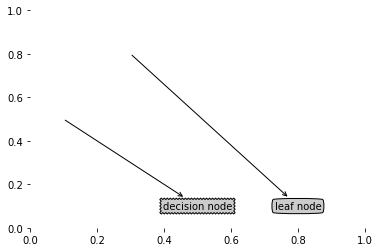

In [4]:
create_plot()

### 构造注解树
绘制一颗完整的树需要一些技巧，如何放置所有的树节点是一个问题。
- 我们必须知道有多少个叶节点：以便可以正确确定 x 轴的长度；
- 我们必须知道树有多少层：以便可以正确确定 y 轴的高度。

In [18]:
def get_num_leafs(my_tree):
    num_leafs = 0
    first_str = list(my_tree.keys())[0]
    second_dict = my_tree[first_str]
    for key in second_dict.keys():
        if type(second_dict[key]).__name__ == 'dict':
            num_leafs += get_num_leafs(second_dict[key])
        else:
            num_leafs += 1
    return num_leafs

In [19]:
def get_tree_depth(my_tree):
    max_depth = 0
    first_str = list(my_tree.keys())[0]
    second_dict = my_tree[first_str]
    for key in second_dict.keys():
        if type(second_dict[key]).__name__ == 'dict':
            this_depth = 1 + get_tree_depth(second_dict[key])
        else:
            this_depth = 1
        if this_depth > max_depth:
            max_depth = this_depth
    return max_depth

- get_num_leafs()：遍历整棵树，累计叶子节点的个数，并返回该数值；
- get_tree_depth()：计算遍历过程中遇到判断节点的个数。该函数的终止条件是叶子节点，一旦到达叶子节点，则从递归调用中返回，并将计算树深度的变量加一。

为了节省时间，retrieve_tree() 函数输出预先存储的树信息，避免再次从数据集中创建树的麻烦。

In [12]:
def retrieve_tree(i):
    list_of_trees = [
        {'no_surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
        {'no_surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return list_of_trees[i]

In [14]:
retrieve_tree(1)

{'no_surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [22]:
my_tree = retrieve_tree(0)
print(get_num_leafs(my_tree))
print(get_tree_depth(my_tree))

3
2


In [23]:
def plot_mid_text(cntr_pt, parent_pt, txt_string):
    x_mid = (parent_pt[0] - cntr_pt[0]) / 2.0 + cntr_pt[0]
    y_mid = (parent_pt[1] - cntr_pt[1]) / 2.0 + cntr_pt[1]
    create_plot.ax1.text(x_mid, y_mid, txt_string)

plot_mid_text() 函数计算父节点和子节点的中间位置，并在此处添加简单的文本标签信息。

In [28]:
def plot_tree(my_tree, parent_pt, node_txt):
    # 计算树的宽和高
    num_leafs = get_num_leafs(my_tree)
    depth = get_tree_depth(my_tree)
    first_str = list(my_tree.keys())[0]
    # 计算树节点的摆放位置，绘制在水平方向和垂直方向的中心位置
    cntr_pt = (plot_tree.xOff + (1.0 + float(num_leafs)) / 2.0 / plot_tree.totalW, plot_tree.yOff)
    # 进行文本和节点绘制
    plot_mid_text(cntr_pt, parent_pt, node_txt)
    plot_node(first_str, cntr_pt, parent_pt, decision_node)
    second_dict = my_tree[first_str]
    # 按比例减少 plot_tree.yOff
    plot_tree.yOff = plot_tree.yOff - 1.0 / plot_tree.totalD
    for key in second_dict.keys():
        if type(second_dict[key]).__name__ == 'dict':
            plot_tree(second_dict[key], cntr_pt, str(key))
        else:
            plot_tree.xOff = plot_tree.xOff + 1.0 / plot_tree.totalW
            plot_node(second_dict[key], (plot_tree.xOff, plot_tree.yOff), cntr_pt, leaf_node)
            plot_mid_text((plot_tree.xOff, plot_tree.yOff), cntr_pt, str(key))
    plot_tree.yOff = plot_tree.yOff + 1.0 / plot_tree.totalD

plot_tree() 函数用以完成绘制树形图的大部分工作。
1. 首先计算树的宽和高，全局变量 plot_tree.totalW 存储树的宽度，plot_tree.totalD 存储树的深度。我们使用这两个变量计算树节点的摆放位置，这样可以将树绘制在水平方向和垂直方向的中心位置。树的宽度用于计算放置判断节点的位置，主要的计算原则是将它放在所有叶子节点的中间，而不仅仅是它子节点的中间。
2. 使用 plot_tree.xOff 和 plot_tree.yOff 追踪已经绘制的节点位置，以及放置以下个节点的恰当位置。
3. 接着，绘制子节点具有的特征值，或者沿此分支向下的数据实例必须具有的特征值。
4. 然后，按比例减少 plot_tree.yOff，并标注此处将要绘制子节点。

In [29]:
def create_plot(in_tree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    create_plot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plot_tree.totalW = float(get_num_leafs(in_tree))
    plot_tree.totalD = float(get_tree_depth(in_tree))
    plot_tree.xOff = -0.5 / plot_tree.totalW
    plot_tree.yOff = 1.0
    plot_tree(in_tree, (0.5, 1.0), '')
    plt.show()

create_plot() 函数创建绘图区，计算树形图的全局尺寸，并调用递归函数 plot_tree()

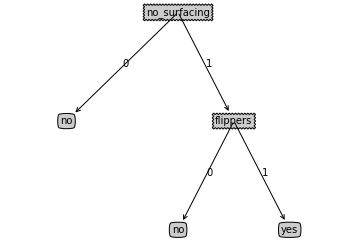

In [30]:
my_tree = retrieve_tree(0)
create_plot(my_tree)

接着，我们变更字典，重新绘制树形图。

In [31]:
my_tree['no_surfacing'][3] = 'maybe'
my_tree

{'no_surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

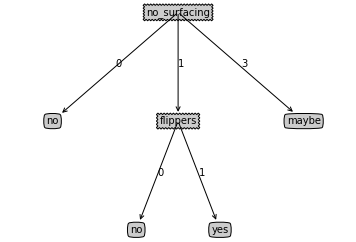

In [32]:
create_plot(my_tree)